In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [3]:
data.drop(columns='time', inplace=True)

print(data.shape)
data.head()

(299, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [4]:
data.duplicated().sum()

0

In [5]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
data = data.sample(frac=1).reset_index(drop=True)

y = data['DEATH_EVENT']
X = data.drop(columns='DEATH_EVENT')

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

X.shape, X_train.shape, X_test.shape

((299, 11), (200, 11), (99, 11))

In [9]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression


numerical_variables = ['age', 'creatinine_phosphokinase',
                        'platelets', 'serum_creatinine',
                        'serum_sodium']
cat_variables = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']


numeric_transformer = Pipeline(steps=[
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('standard', StandardScaler()),
    ('feat_sel', SelectFromModel(LogisticRegression(max_iter=1000), max_features=12))])
    
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_variables),
        ('cat', 'passthrough', cat_variables)
        ])


pre = Pipeline(steps=[('preprocessor', preprocessor)])

label_features=numerical_variables+cat_variables

X_train = pd.DataFrame(pre.fit_transform(X_train, y_train))
X_test = pd.DataFrame(pre.transform(X_test))

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

xgbc = XGBClassifier()
dtc = DecisionTreeClassifier(random_state=111)
knc = KNeighborsClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier(random_state=111)
abc = AdaBoostClassifier(random_state=111)
bc = BaggingClassifier(random_state=111)
etc = ExtraTreesClassifier(random_state=111)

In [11]:
xgbc.fit(X_train, y_train)
dtc.fit(X_train, y_train)
knc.fit(X_train, y_train)
lrc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
bc.fit(X_train, y_train)
etc.fit(X_train, y_train)

C:\Users\juanm\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ExtraTreesClassifier(random_state=111)

In [12]:
# train done using all 12 columns 
from sklearn.metrics import f1_score

models = ['xgbc','dtc','knc','lrc','rfc','abc','bc','etc']

results1 = [f1_score(xgbc.predict(X_test), y_test), f1_score(dtc.predict(X_test), y_test),
    f1_score(knc.predict(X_test), y_test), f1_score(lrc.predict(X_test), y_test),
    f1_score(rfc.predict(X_test), y_test), f1_score(abc.predict(X_test), y_test),
    f1_score(bc.predict(X_test), y_test), f1_score(etc.predict(X_test), y_test)]

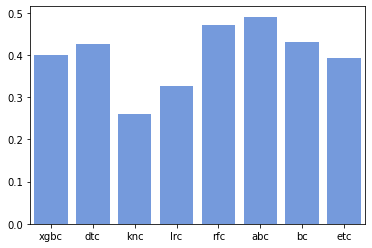

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

ax = sns.barplot(x=models, y=results1, label='all', color='cornflowerblue')

In [29]:
np.arange(5)

array([0, 1, 2, 3, 4])

C:\Users\juanm\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


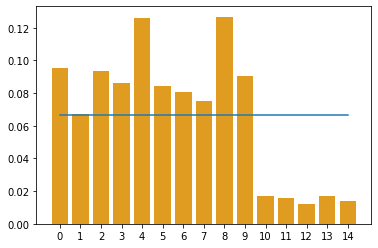

In [30]:



fig, ax = plt.subplots()

ax=sns.barplot(np.arange(len(rfc.feature_importances_)),rfc.feature_importances_, color='orange')
ax.plot(np.arange(len(rfc.feature_importances_)), np.mean(rfc.feature_importances_)*np.ones(len(rfc.feature_importances_)))

In [13]:
rf_model = RandomForestClassifier(n_estimators=100,
                                 max_leaf_nodes=15,
                                 bootstrap=False,
                                 max_samples=100,
                                 n_jobs=-1,
                                 random_state=0)

rf_model.fit(X_train, y_train)

f1_score(rf_model.predict(X_test), y_test)

0.676923076923077